# Predicting the HouseSales 

## Project Description:
## Given three comma-seperated-value files (house_sales, train & validation) 
### This project is an inspiration from the DataCamp's Associate Data Scientist Certification Practical Exam. Here in this notebook file, I have tried to solve the problem by preprocessing the data, applying extensive EDA, Visualizations and then the Machine Learning. For that, I used two robust models, Linear Regression & Random Forest Regressor due to the nature of variables. The house_sales.csv comprises of 1500 rows and 8 columns. After letting the Machine learn the Algorithm, I recieved a handsome RMSE of a price of 18163.2.

#### Notebook Rights Reserved® to: Hamid, Muhammad 
#### https://github.com/mh4m1d
#### https://linkedin.com/in/mhamidmasud/

# Loading the Dataset into df
### Importing the Essential Libraries

In [49]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# to ignore the specific FutureWarning related to Seaborn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [51]:
df=pd.read_csv('house_sales.csv')

### Basic Pandas Functions

In [52]:
df.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8 sq.m.
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8 sq.m.
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5 sq.m.
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Det.,528.4 sq.m.
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1 sq.m.


In [53]:
df.shape

(1500, 8)

In [54]:
df.drop_duplicates(inplace=True)
df.shape

(1500, 8)

In [55]:
df.dtypes

house_id           int64
city              object
sale_price         int64
sale_date         object
months_listed    float64
bedrooms           int64
house_type        object
area              object
dtype: object

In [56]:
df.isnull().sum()

house_id          0
city              0
sale_price        0
sale_date         0
months_listed    31
bedrooms          0
house_type        0
area              0
dtype: int64

In [57]:
df[df['months_listed'].isna()].head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
6,1353069,Teasdale,429914,2021-05-18,NaN,6,Detached,544.6 sq.m.
20,1239607,Poppleton,173098,2020-04-16,NaN,3,Detached,296.9 sq.m.
77,1981646,Riverford,26348,2022-10-03,NaN,2,Terraced,109.0 sq.m.
85,1589617,Poppleton,157600,2021-10-11,NaN,3,Detached,260.3 sq.m.
97,1138391,Poppleton,273335,2021-12-04,NaN,5,Detached,464.4 sq.m.


# Data Cleaning & EDA
### As there are many missing values in the dataset and the datatypes of various columns need to be changed, so we are going to process the dataset.

In [58]:
df['city']=df['city'].fillna('Unknown')
df['city'].unique()

array(['Silvertown', 'Riverford', 'Teasdale', 'Poppleton', '--'],
      dtype=object)

In [59]:
df.dropna(subset='sale_price',inplace=True)

In [60]:
df['sale_date']=pd.to_datetime(df['sale_date'])
df['sale_date']=df['sale_date'].fillna(pd.to_datetime('2023-01-01'))

In [61]:
months_mean=df['months_listed'].mean().round(1)
df['months_listed']=df['months_listed'].fillna(months_mean).round(1)

In [62]:
beds_mean=df['bedrooms'].mean().round(1)
df['bedrooms']=df['bedrooms'].fillna(beds_mean).round(1)

In [63]:
df['house_type']=df['house_type'].replace('Semi','Semi-detached')
df['house_type']=df['house_type'].replace('Terr.','Terraced')
df['house_type']=df['house_type'].replace('Det.','Detached')

In [64]:
df['area'] = df['area'].str.replace(' sq.m.', '', regex=True)
df['area']=pd.to_numeric(df['area'])
area_mean=df['area'].mean().round(1)
df['area']=df['area'].fillna(area_mean)

In [65]:
price_rooms = df.groupby('bedrooms')['sale_price'].agg(['mean', 'var']).round(1).reset_index()
price_rooms.columns = ['bedrooms', 'avg_price', 'variance_price']

price_rooms.head()

,bedrooms,avg_price,variance_price
0,2,67076.4,5.652896e+08
1,3,154665.1,2.378289e+09
2,4,234704.6,1.725211e+09
3,5,301515.9,2.484328e+09
4,6,375741.3,3.924432e+09


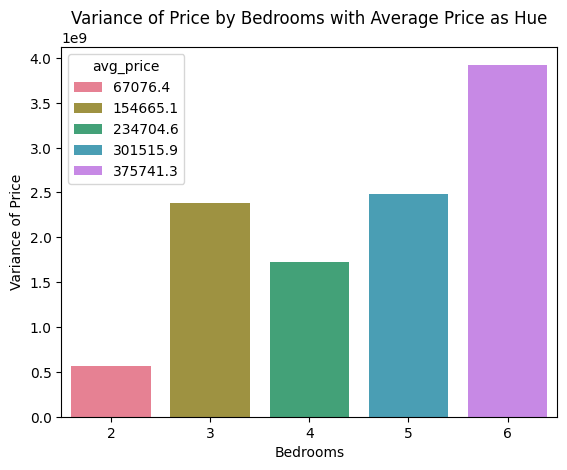

In [66]:
color_palette = sns.color_palette("husl", n_colors=len(price_rooms['avg_price'].unique()))
sns.barplot(data=price_rooms, x='bedrooms', y='variance_price', hue='avg_price', palette=color_palette)

plt.xlabel('Bedrooms')
plt.ylabel('Variance of Price')
plt.title('Variance of Price by Bedrooms with Average Price as Hue')

# Display the plot
plt.show()

# Importing & Data Visualization of the train.csv & validation.csv

In [67]:
train_df=pd.read_csv('train.csv')
val_df=pd.read_csv('validation.csv')

In [68]:
train_df.isna().sum()

house_id         0
city             0
sale_price       0
sale_date        0
months_listed    0
bedrooms         0
house_type       0
area             0
dtype: int64

In [69]:
train_df.dtypes

house_id           int64
city              object
sale_price         int64
sale_date         object
months_listed    float64
bedrooms           int64
house_type        object
area             float64
dtype: object

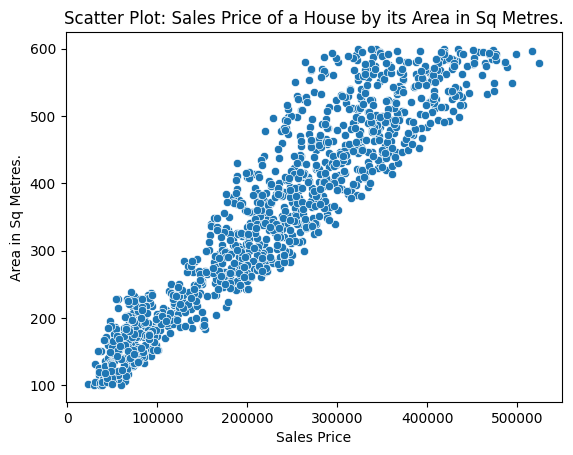

In [70]:
sns.scatterplot(data=train_df,x='sale_price',y='area')
plt.xlabel('Sales Price')
plt.ylabel('Area in Sq Metres.')
plt.title('Scatter Plot: Sales Price of a House by its Area in Sq Metres.')
plt.show()

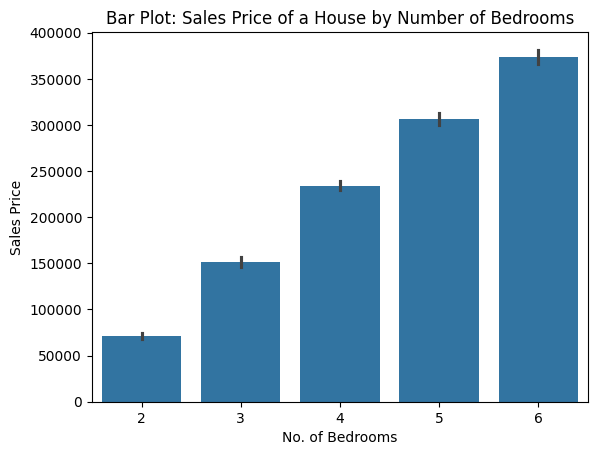

In [71]:
sns.barplot(data=train_df,x='bedrooms',y='sale_price')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Sales Price')
plt.title('Bar Plot: Sales Price of a House by Number of Bedrooms')
plt.show()

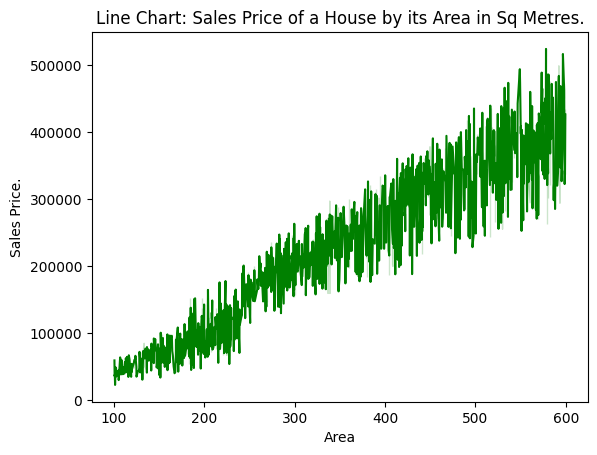

In [72]:
sns.lineplot(data=train_df,x='area',y='sale_price',color='green')
plt.xlabel('Area')
plt.ylabel('Sales Price.')
plt.title('Line Chart: Sales Price of a House by its Area in Sq Metres.')
plt.show()

# Machine Learning
## Baseline Model
#### For the baseline model, here, I am completing the necessary EDA for train and validation datasets. For the baseline model, I've choosen Linear Regression

In [73]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import LabelEncoder

model = LinearRegression()

# Load the training and validation datasets
train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('validation.csv')

## Conversion of the data types of different columns

In [74]:
def transform_city(data):
     data['city'] = data['city'].fillna('Unknown')

def transform_sale_date(data):
    data['sale_date']= data['sale_date'].fillna(pd.to_datetime('2023-01-01'))

def transform_months_listed(data):
    mean_months_listed = data['months_listed'].mean().round(1)
    data['months_listed']=data['months_listed'].fillna(mean_months_listed)

def transform_bedrooms(data):
    mean_bedrooms = data['bedrooms'].mean().round(1)
    data['bedrooms'] = data['bedrooms'].fillna(mean_bedrooms)

def transform_house_type(data):
     data['house_type'] = data['house_type'].fillna(data['house_type'].mode()[0])

def transform_area(data):
      data['area'] = data['area'].fillna(data['area'].mean().round(1))

### Transforming training dataset for accessiblity

In [75]:
transform_city(train_df)
transform_sale_date(train_df)
transform_months_listed(train_df)
transform_bedrooms(train_df)
transform_house_type(train_df)
transform_area(train_df)

### Conversion of validation dataset types for easiness

In [76]:
transform_city(val_df)
transform_sale_date(val_df)
transform_months_listed(val_df)
transform_bedrooms(val_df)
transform_house_type(val_df)
transform_area(val_df)

In [77]:
# 'house_type' and 'city' columns encoding
train_df = pd.get_dummies(train_df, columns=['house_type', 'city'])
val_df = pd.get_dummies(val_df, columns=['house_type', 'city'])

In [78]:
# Making new columns i.e. year, month and day
train_df['sale_date'] = pd.to_datetime(train_df['sale_date'])
val_df['sale_date'] = pd.to_datetime(val_df['sale_date'])

# for train_data
train_df['sale_year'] = train_df['sale_date'].dt.year
train_df['sale_month'] = train_df['sale_date'].dt.month
train_df['sale_day'] = train_df['sale_date'].dt.day

# for val_data
val_df['sale_date'] = pd.to_datetime(val_df['sale_date'])
val_df['sale_year'] = val_df['sale_date'].dt.year
val_df['sale_month'] = val_df['sale_date'].dt.month
val_df['sale_day'] = val_df['sale_date'].dt.day

In [79]:
# Drop the original 'sale_date' columns
train_df.drop('sale_date', axis=1, inplace=True)
val_df.drop('sale_date', axis=1, inplace=True)

In [80]:
# Model Fitting
model.fit(train_df.drop('sale_price', axis=1), train_df['sale_price'])

LinearRegression()

In [81]:
# Making Predictions
predicted_prices = model.predict(val_df)

In [82]:
# A baseline dataframe having house_ids and their prices
baseline = pd.DataFrame({'house_id': val_df['house_id'], 'price': predicted_prices})

baseline

,house_id,price
0,1331375,121709.813918
1,1630115,304232.551410
2,1645745,384418.334267
3,1336775,125014.708890
4,1888274,270695.083194
...,...,...
295,1986255,349092.841750
296,1896276,368686.764539
297,1758223,257195.388196
298,1752010,169083.390810


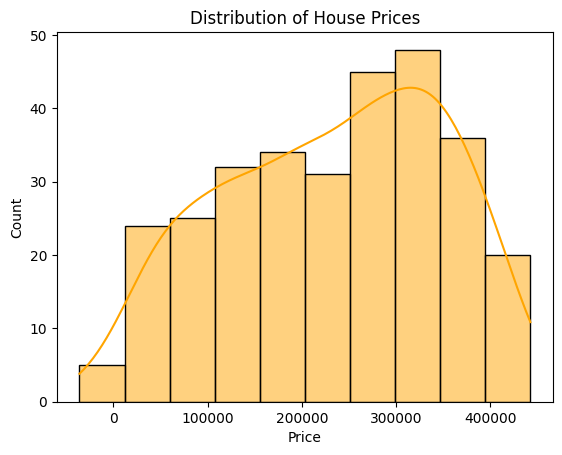

In [83]:
sns.histplot(baseline['price'], kde=True,color='orange')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

## Comparison Model
#### For the comparison model, I've choosen RandomForestRegressor due to its robust performance. Then lastly, I will be checking for the comparison between the accuracies of these two models.

In [84]:
from sklearn.ensemble import RandomForestRegressor

# Loading the datasets again
train_data = pd.read_csv('train.csv')
val_data = pd.read_csv('validation.csv')

In [85]:
# Transforming the train dataset
transform_city(train_data)
transform_sale_date(train_data)
transform_months_listed(train_data)
transform_bedrooms(train_data)
transform_house_type(train_data)
transform_area(train_data)

In [86]:
# Transforming the validation dataset
transform_city(val_data)
transform_sale_date(val_data)
transform_months_listed(val_data)
transform_bedrooms(val_data)
transform_house_type(val_data)
transform_area(val_data)

In [87]:
model = RandomForestRegressor()

train_data = pd.get_dummies(train_data, columns=['house_type', 'city'])
val_data = pd.get_dummies(val_data, columns=['house_type', 'city'])

train_data['sale_date'] = pd.to_datetime(train_data['sale_date'])
val_data['sale_date'] = pd.to_datetime(val_data['sale_date'])

train_data['sale_year'] = train_data['sale_date'].dt.year
train_data['sale_month'] = train_data['sale_date'].dt.month
train_data['sale_day'] = train_data['sale_date'].dt.day

val_data['sale_date'] = pd.to_datetime(val_data['sale_date'])
val_data['sale_year'] = val_data['sale_date'].dt.year
val_data['sale_month'] = val_data['sale_date'].dt.month
val_data['sale_day'] = val_data['sale_date'].dt.day


In [88]:
# Drop the original 'sale_date' columns
train_data.drop('sale_date', axis=1, inplace=True)
val_data.drop('sale_date', axis=1, inplace=True)

In [89]:
# Model Fitting
model.fit(train_data.drop('sale_price', axis=1), train_data['sale_price'])

RandomForestRegressor()

In [90]:
# Making Predictions on validation data
predicted_prices = model.predict(val_data)

In [91]:
# Create the base_result dataframe with house_id and predicted price
regressor_df = pd.DataFrame({'house_id': val_data['house_id'], 'price': predicted_prices})

# Display the resulting dataframe
regressor_df

,house_id,price
0,1331375,80844.30
1,1630115,307200.95
2,1645745,400187.75
3,1336775,106170.45
4,1888274,262128.43
...,...,...
295,1986255,360545.68
296,1896276,383872.06
297,1758223,257285.35
298,1752010,173798.62


## Comparison between the two Models by Visualizations

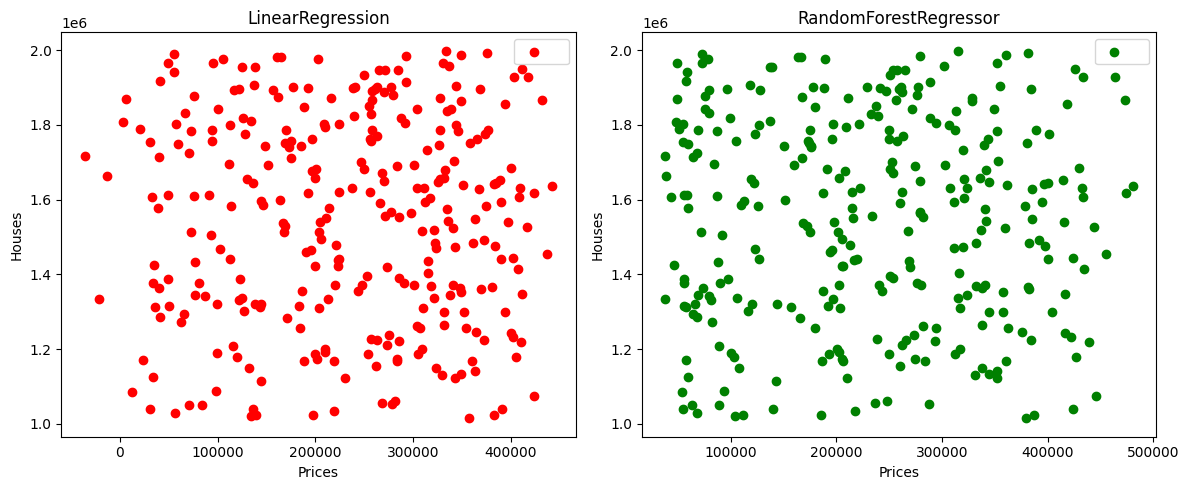

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for dataset 1
axes[0].scatter(data=baseline,x='price',y='house_id',color='red',label=' ')
axes[0].set_title('LinearRegression')
axes[0].set_xlabel('Prices')
axes[0].set_ylabel('Houses')
axes[0].legend()

# Scatter plot for dataset 2
axes[1].scatter(data=regressor_df, x='price',y='house_id',color='green',label=' ')
axes[1].set_title('RandomForestRegressor')
axes[1].set_xlabel('Prices')
axes[1].set_ylabel('Houses')
axes[1].legend()

plt.tight_layout()

# Show the plots
plt.show()

Text(0.5, 0.98, 'Pairplot: LinearRegression Model')

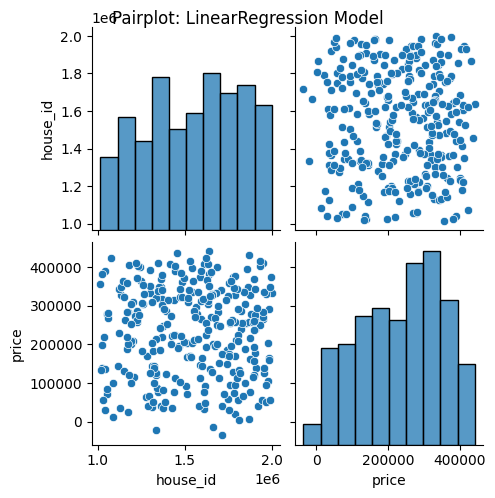

In [93]:
sns.pairplot(data=baseline)
plt.suptitle('Pairplot: LinearRegression Model')

Text(0.5, 0.98, 'Pairplot: RandomForestRegressor Model')

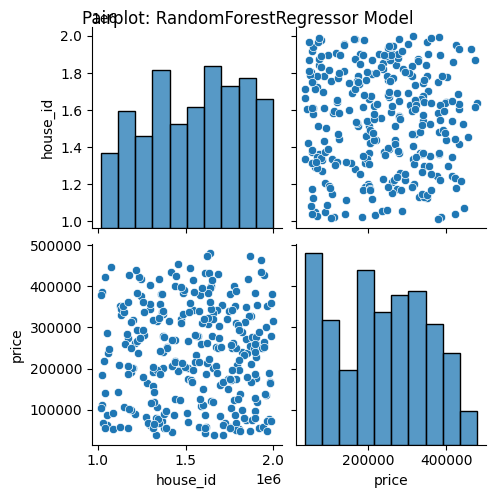

In [94]:
sns.pairplot(data=regressor_df)
plt.suptitle('Pairplot: RandomForestRegressor Model')

# Comparison between the two Robust Models

In [95]:
RMSE = math.sqrt(np.square(baseline["price"] - regressor_df["price"]).mean())
print(f"Root Mean-Squared Error: {RMSE}")

Root Mean-Squared Error: 18163.5236355163
